### Import and Read Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


### Conversion Rate Analysis Based on Income, Spending, and Age

In [3]:
# Menghitung conversion rate
conversion_rate = df['Response'].sum() / len(df)

# Membuat kolom baru 'Conversion_Rate' dengan nilai yang sama untuk semua baris
df['Conversion_Rate'] = conversion_rate

# Menampilkan lima baris pertama untuk memverifikasi perubahan
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,0.149107
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,0.149107
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,0.149107
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,0.149107
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,0.149107


In [4]:
# Menghitung umur berdasarkan tahun kelahiran
current_year = 2023
df['Age'] = current_year - df['Year_Birth']

# Membuat fungsi untuk mengelompokkan umur ke dalam kategori
def categorize_age(age):
    if age < 30:
        return 'Muda'
    elif age < 50:
        return 'Dewasa'
    else:
        return 'Tua'

# Menggunakan fungsi tersebut untuk membuat kolom baru 'Age_Group'
df['Age_Group'] = df['Age'].apply(categorize_age)

# Menampilkan lima baris pertama untuk memverifikasi perubahan
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Age_Group
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,3,11,1,0.149107,66,Tua
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,3,11,0,0.149107,69,Tua
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,3,11,0,0.149107,58,Tua
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,3,11,0,0.149107,39,Dewasa
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,3,11,0,0.149107,42,Dewasa


<ipython-input-5-d8ddb34e364b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_Group', y='Conversion_Rate', data=df, ci=None)


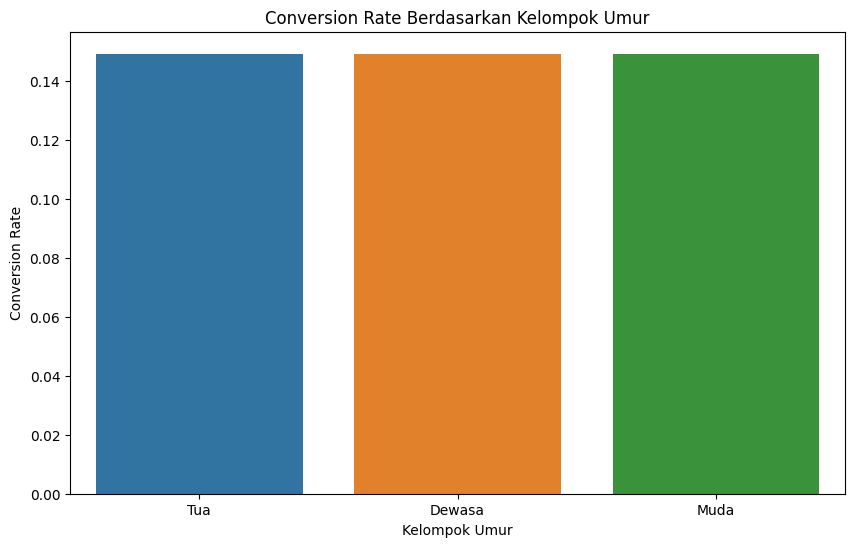

In [5]:
# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat plot bar untuk menunjukkan conversion rate berdasarkan kelompok umur
sns.barplot(x='Age_Group', y='Conversion_Rate', data=df, ci=None)

# Menambahkan judul dan label
plt.title('Conversion Rate Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Conversion Rate')

# Menampilkan plot
plt.show()

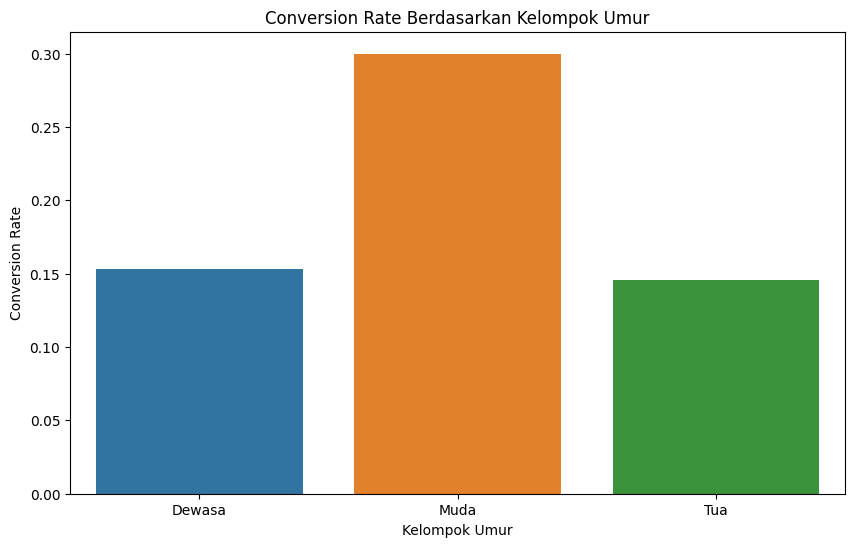

In [6]:
# Menghitung conversion rate untuk setiap kelompok umur
age_group_conversion_rate = df.groupby('Age_Group')['Response'].mean()

# Mengubah hasilnya menjadi DataFrame untuk plotting
age_group_conversion_rate_df = age_group_conversion_rate.reset_index()
age_group_conversion_rate_df.columns = ['Age_Group', 'Conversion_Rate']

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat plot bar untuk menunjukkan conversion rate berdasarkan kelompok umur
sns.barplot(x='Age_Group', y='Conversion_Rate', data=age_group_conversion_rate_df)

# Menambahkan judul dan label
plt.title('Conversion Rate Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Conversion Rate')

# Menampilkan plot
plt.show()

1. Kelompok Muda: Conversion rate dalam kelompok ini tampak lebih tinggi dibandingkan kelompok lain. Ini mungkin menunjukkan bahwa kampanye pemasaran sangat efektif dalam menarik perhatian kelompok usia ini.
2. Kelompok Dewasa: Kelompok ini menunjukkan conversion rate yang lebih tinggi dibandingkan kelompok tua, mungkin mengindikasikan bahwa kampanye cukup sesuai dengan kelompok usia ini.
3. Kelompok Tua: Conversion rate dalam kelompok ini paling rendah daripada kelompok lain, menunjukkan bahwa kampanye ini tidak terlalu berpengaruh pada kelompok usia ini.

Hubungan ini menunjukkan bahwa umur pelanggan berpengaruh terhadap respons mereka terhadap kampanye pemasaran. Strategi pemasaran yang berbeda mungkin diperlukan untuk menargetkan kelompok usia yang berbeda dengan lebih efektif.

### Data Cleaning & Preprocessing

In [7]:
# 1. Mengidentifikasi Data Null
null_data = df.isnull().sum()
null_columns = null_data[null_data > 0]

In [8]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Conversion_Rate         0
Age                     0
Age_Group               0
dtype: int64

In [9]:
# 2. Mengidentifikasi Data Duplikat
duplicated_data = df.duplicated().sum()

null_columns, duplicated_data

(Income    24
 dtype: int64,
 0)

In [10]:
# Mengganti nilai null pada kolom 'Income' dengan median
income_median = df['Income'].median()
df['Income'].fillna(income_median, inplace=True)

# Memeriksa kembali kolom untuk memastikan tidak ada lagi nilai null
null_data_after_replacement = df['Income'].isnull().sum()
null_data_after_replacement

0

In [11]:
# Menyimpan hanya kolom yang relevan untuk analisis
relevant_columns = [
    'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
    'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Age_Group', 'Response'
]

# Memperbarui DataFrame untuk menyertakan hanya kolom yang relevan
df = df[relevant_columns]

# Menampilkan lima baris pertama untuk memverifikasi perubahan
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Age_Group,Response
0,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,66,Tua,1
1,S1,Lajang,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,69,Tua,0
2,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,58,Tua,0
3,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,39,Dewasa,0
4,S3,Menikah,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,42,Dewasa,0


In [12]:
# Melakukan One-Hot Encoding untuk kolom 'Education' dan 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Melakukan Label Encoding untuk kolom 'Age_Group'
label_encoder = LabelEncoder()
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])

# Menampilkan lima baris pertama untuk memverifikasi perubahan
df.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,...,1,1,0,0,0,0,0,0,1,0
1,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,...,0,1,0,0,0,0,0,0,1,0
2,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,...,0,1,0,0,0,0,0,0,0,0
3,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,...,0,1,0,0,0,0,0,0,0,0
4,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,...,0,0,0,1,0,0,0,0,0,1


In [13]:
# Menentukan fitur yang akan distandardisasi (semua kecuali kolom target 'Response')
features_to_scale = df.columns.difference(['Response'])

# Menerapkan StandardScaler pada fitur yang dipilih
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Menampilkan lima baris pertama untuk memverifikasi perubahan
df.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,1,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,1.904757,-0.792406
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,1.904757,-0.792406
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0,-1.006270,-0.444816,1.899751,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,1.261980


### Data Modelling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

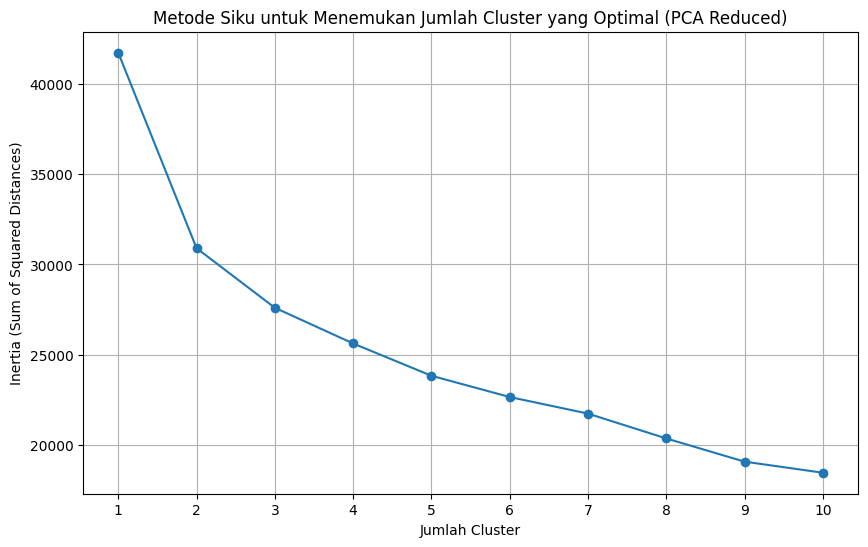

In [14]:
# Menentukan rentang jumlah cluster yang akan diuji
clusters_range = range(1, 11)

# Mengurangi dimensi data menjadi 10 komponen utama menggunakan PCA
pca = PCA(n_components=10, random_state=42)
reduced_data = pca.fit_transform(df)

# Menghitung sum of squared distances (inertia) untuk setiap jumlah cluster pada data yang telah direduksi
reduced_inertia = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    reduced_inertia.append(kmeans.inertia_)

# Membuat plot elbow untuk menemukan jumlah cluster yang optimal pada data yang telah direduksi
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, reduced_inertia, marker='o')
plt.title('Metode Siku untuk Menemukan Jumlah Cluster yang Optimal (PCA Reduced)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()

In [15]:
# Menjalankan algoritma k-means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Menampilkan lima baris pertama untuk memverifikasi hasil clustering
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Cluster
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,1.904757,-0.792406,0
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,1.904757,-0.792406,1
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,0
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,1
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-1.006270,-0.444816,1.899751,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,1.261980,1


In [25]:
# Memilih kolom numerik dari dataframe
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Menjalankan algoritma k-means dengan 3 cluster pada kolom numerik
kmeans_numerical = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans_numerical.fit_predict(df[numerical_columns])

# Menampilkan lima baris pertama untuk memverifikasi hasil clustering
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Cluster
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,1.904757,-0.792406,2
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,1.904757,-0.792406,0
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,2
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0.993769,-0.444816,-0.526385,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,0
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-1.006270,-0.444816,1.899751,-0.157171,-0.339909,-0.036621,-0.188676,-0.525001,1.261980,0


In [27]:
# Menghitung Silhouette Score menggunakan fitur numerik dan label cluster
silhouette_score = silhouette_score(df[numerical_columns], df['Cluster'])

silhouette_score

0.14476395669126546

### Customer Personality Analysis for Marketing Retargeting

In [28]:
# Menghitung rata-rata untuk setiap fitur numerik dalam setiap cluster
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()

# Menampilkan ringkasan cluster
cluster_summary.transpose()

Cluster,0,1,2
Income,-0.716633,0.206425,0.959545
Kidhome,0.691563,-0.389298,-0.727440
Teenhome,-0.178213,0.834618,-0.579447
Recency,0.018288,-0.038748,0.010480
MntCoke,-0.787055,0.414779,0.857416
MntFruits,-0.528899,-0.194805,1.070745
MntMeatProducts,-0.635181,-0.194206,1.244403
MntFishProducts,-0.548159,-0.210937,1.119177
MntSweetProducts,-0.525713,-0.203454,1.074554
MntGoldProds,-0.534022,0.223350,0.642423


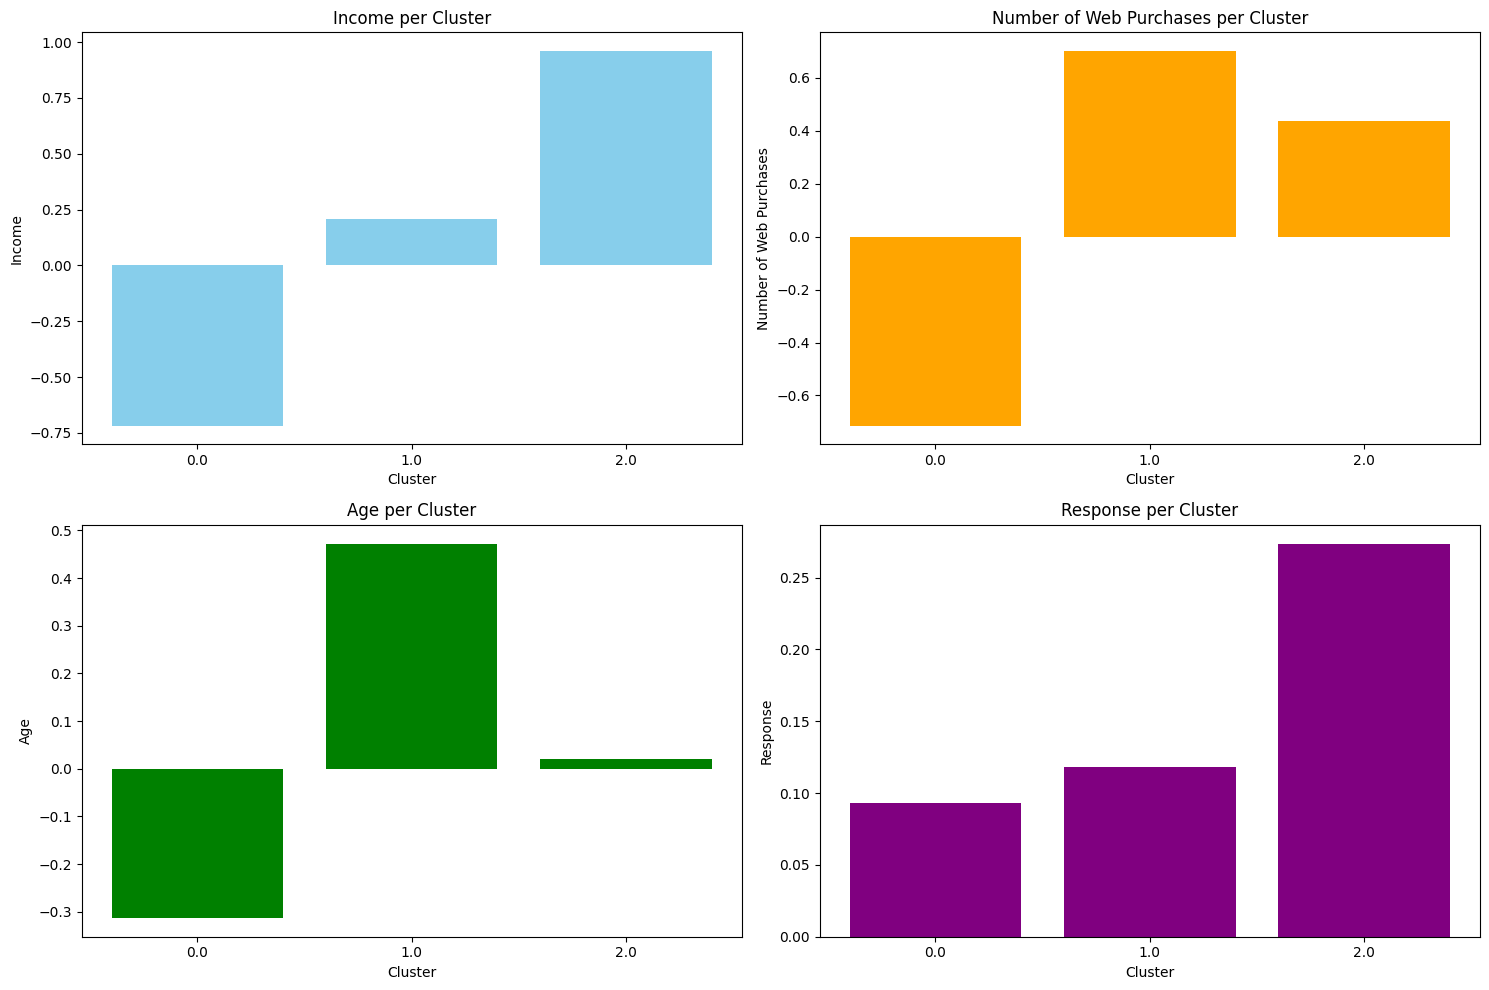

In [33]:
cluster_df = cluster_summary

# Plotting interesting features
plt.figure(figsize=[15, 10])

# Income
plt.subplot(2, 2, 1)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['Income'], color='skyblue')
plt.title('Income per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.xticks(cluster_df['Cluster'])

# NumWebPurchases
plt.subplot(2, 2, 2)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['NumWebPurchases'], color='orange')
plt.title('Number of Web Purchases per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Web Purchases')
plt.xticks(cluster_df['Cluster'])

# Age
plt.subplot(2, 2, 3)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['Age'], color='green')
plt.title('Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.xticks(cluster_df['Cluster'])

# Response
plt.subplot(2, 2, 4)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['Response'], color='purple')
plt.title('Response per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Response')
plt.xticks(cluster_df['Cluster'])

plt.tight_layout()
plt.show()

Berikut adalah visualisasi dari beberapa fitur untuk Cluster 0, 1, dan 2:

1. **Income per Cluster:** Plot ini menunjukkan profil pendapatan untuk setiap cluster. Cluster 2 memiliki pendapatan terbesar, sedangkan Cluster 0 memiliki pendapatan terendah.

2. **Number of Web Purchases per Cluster:** Plot ini menunjukkan jumlah pembelian web rata-rata dalam setiap cluster. Cluster 1 menonjol dengan jumlah pembelian web yang lebih tinggi.

3. **Age per Cluster:** Plot ini menunjukkan profil usia untuk setiap cluster. Cluster 1 cenderung memiliki usia yang lebih tinggi, sedangkan Cluster 0 memiliki usia yang lebih rendah.

4. **Response per Cluster:** Plot ini menunjukkan respons terhadap kampanye pemasaran untuk setiap cluster. Cluster 2 menunjukkan respons yang lebih tinggi dibandingkan dengan cluster lainnya.

### Cluster 0
- **Pendapatan (`Income`):** Rendah, jauh di bawah rata-rata keseluruhan.
- **Jumlah Anak-anak dan Remaja (`Kidhome`, `Teenhome`):** Tinggi untuk anak-anak, rendah untuk remaja.
- **Pengeluaran Produk (`MntCoke`, `MntFruits`, dll.):** Pengeluaran rendah untuk semua produk.
- **Pembelian (`NumWebPurchases`, `NumCatalogPurchases`, dll.):** Lebih sedikit pembelian online dan di toko.
- **Umur (`Age`, `Age_Group`):** Lebih muda dari rata-rata.
- **Respon (`Response`):** Respon positif lebih rendah.
- **Pendidikan (`Education_S1`, dll.):** Lebih banyak pendidikan SMA, lebih sedikit pendidikan lainnya.
- **Status Perkawinan (`Marital_Status_Cerai`, dll.):** Lebih banyak yang lajang, lebih sedikit yang cerai atau janda.

### Cluster 1
- **Pendapatan (`Income`):** Sedikit di atas rata-rata keseluruhan.
- **Jumlah Anak-anak dan Remaja (`Kidhome`, `Teenhome`):** Sedikit anak-anak, lebih banyak remaja.
- **Pengeluaran Produk (`MntCoke`, `MntFruits`, dll.):** Pengeluaran moderat untuk semua produk.
- **Pembelian (`NumWebPurchases`, `NumCatalogPurchases`, dll.):** Lebih banyak pembelian online, sedikit pembelian katalog.
- **Umur (`Age`, `Age_Group`):** Lebih tua dari rata-rata.
- **Respon (`Response`):** Respon positif moderat.
- **Pendidikan (`Education_S1`, dll.):** Lebih sedikit pendidikan SMA, lebih banyak pendidikan S1 dan S3.
- **Status Perkawinan (`Marital_Status_Cerai`, dll.):** Lebih sedikit yang lajang, lebih banyak yang cerai atau janda.

### Cluster 2
- **Pendapatan (`Income`):** Tinggi, jauh di atas rata-rata keseluruhan.
- **Jumlah Anak-anak dan Remaja (`Kidhome`, `Teenhome`):** Sedikit anak-anak dan remaja.
- **Pengeluaran Produk (`MntCoke`, `MntFruits`, dll.):** Pengeluaran tinggi untuk semua produk.
- **Pembelian (`NumWebPurchases`, `NumCatalogPurchases`, dll.):** Lebih banyak pembelian online dan di toko.
- **Umur (`Age`, `Age_Group`):** Dekat dengan rata-rata.
- **Respon (`Response`):** Respon positif lebih tinggi.
- **Pendidikan (`Education_S1`, dll.):** Distribusi pendidikan mirip dengan Cluster 1.
- **Status Perkawinan (`Marital_Status_Cerai`, dll.):** Lebih banyak yang menikah, lebih sedikit yang cerai atau janda.

Setelah berbagai pertimbangan, Cluster 2 cocok untuk dijadikan sebagai marketing retargetting

### Profil Cluster 2
- **Pendapatan Tinggi:** Pelanggan dalam cluster ini memiliki pendapatan di atas rata-rata, sehingga mungkin lebih terbuka terhadap produk atau layanan premium.
- **Pengeluaran Tinggi:** Mereka telah menghabiskan lebih banyak pada berbagai produk, menunjukkan minat dan kemampuan untuk berbelanja.
- **Respon Positif Lebih Tinggi:** Ada kecenderungan untuk merespons lebih positif terhadap penawaran sebelumnya, yang bisa menjadi indikasi untuk kesuksesan kampanye di masa depan.
- **Sedikit Anak-anak dan Remaja:** Mungkin menunjukkan fleksibilitas lebih dalam pengeluaran atau minat dalam produk yang ditujukan untuk individu atau pasangan tanpa anak.

### Strategi Retargeting
- **Tawarkan Produk Premium:** Mengingat pendapatan dan pengeluaran yang tinggi, pertimbangkan untuk menawarkan produk atau layanan premium, eksklusif, atau khusus.
- **Personalisasi Penawaran:** Gunakan data historis tentang pembelian dan respons sebelumnya untuk membuat penawaran yang disesuaikan dengan minat dan perilaku pelanggan.
- **Kampanye Online yang Kuat:** Mengingat pengeluaran yang lebih tinggi pada pembelian online, pertimbangkan strategi pemasaran digital yang kuat, termasuk iklan online yang ditargetkan dan penawaran khusus melalui email atau media sosial.


In [29]:
# Menghitung jumlah pelanggan dalam Cluster 2
cluster_2_size = len(df[df['Cluster'] == 2])

cluster_2_size

608

In [30]:
# Asumsi tingkat respon dan nilai rata-rata transaksi
expected_response_rate = 0.10
average_transaction_value = 500000

# Menghitung konversi yang diharapkan
expected_conversions = cluster_2_size * expected_response_rate

# Menghitung dampak pendapatan potensial (dalam IDR)
potential_revenue_impact = expected_conversions * average_transaction_value

potential_revenue_impact

30400000.000000004

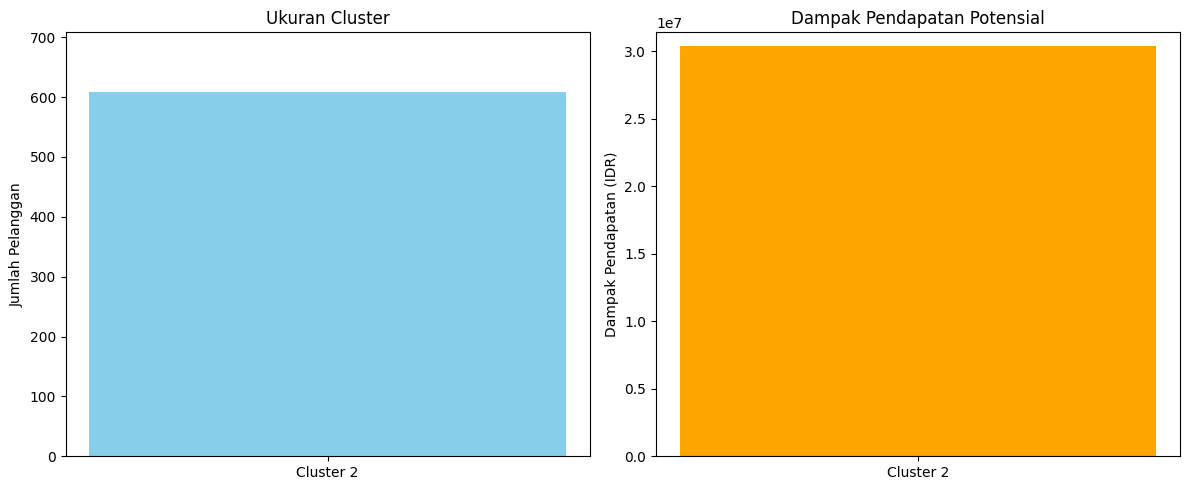

In [31]:
# Data untuk plot
clusters = ['Cluster 2']
cluster_sizes = [608]
potential_revenue = [30400000]

# Membuat plot ukuran cluster
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.bar(clusters, cluster_sizes, color='skyblue')
plt.title('Ukuran Cluster')
plt.ylabel('Jumlah Pelanggan')
plt.ylim(0, max(cluster_sizes) + 100)

# Membuat plot dampak pendapatan potensial
plt.subplot(1, 2, 2)
plt.bar(clusters, potential_revenue, color='orange')
plt.title('Dampak Pendapatan Potensial')
plt.ylabel('Dampak Pendapatan (IDR)')
plt.ylim(0, max(potential_revenue) + 1000000)

plt.tight_layout()
plt.show()

#### Ukuran Cluster

**Cluster 2:** Terdiri dari 608 pelanggan. Ini adalah kelompok target untuk kampanye retargeting.

#### Dampak Pendapatan Potensial
Cluster 2: Dampak pendapatan potensial dari kampanye retargeting pada cluster ini diperkirakan sebesar IDR 30.400.000,-